In [1]:
# binned by tss and fraction of active (-1.5), as a function of tss ( what fraction are active)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gpplot as gpp
import numpy as np

In [2]:
horlbeck_2016_sept = pd.read_csv('../data/horlbeck_2016_sept/horlbeck2016_sept_activity.csv')


In [3]:
horlbeck_2016_sept.shape

(3257, 11)

In [4]:
rs3_train = pd.read_excel('../../../../../Manuscripts/2021 Rule Set 3/SupplementaryData/Supplementary Data 2 - Rule Set 3 (Sequence) Model Data.xlsx', sheet_name = 'Train')

In [5]:
horlbeck_2016_sept_nolap = horlbeck_2016_sept[~horlbeck_2016_sept['sgRNA Context Sequence'].
                                              isin(rs3_train['sgRNA Context Sequence'])]

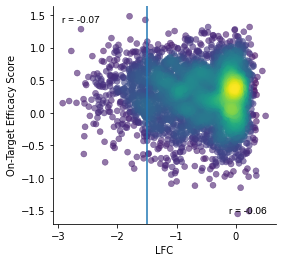

In [7]:

plt.subplots(figsize=(4,4))
gpp.point_densityplot(data=horlbeck_2016_sept_nolap, x='avg_lfc', y="On-Target Efficacy Score")
gpp.add_correlation(data=horlbeck_2016_sept_nolap, x='avg_lfc', y="On-Target Efficacy Score")
gpp.add_correlation(data=horlbeck_2016_sept_nolap, x='avg_lfc', y="On-Target Efficacy Score", method='spearman', loc='lower right')
plt.axvline(x=-1.5)
plt.xlabel('LFC')
sns.despine()
gpp.savefig('../figure/RS3_lfc_horlbeck_2016.pdf', dpi=300)



<AxesSubplot:xlabel='avg_mean_centered_neg_lfc', ylabel='On-Target Efficacy Score'>

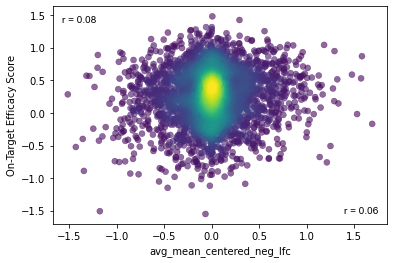

In [8]:
gpp.point_densityplot(data=horlbeck_2016_sept_nolap, x='avg_mean_centered_neg_lfc', y="On-Target Efficacy Score")
gpp.add_correlation(data=horlbeck_2016_sept_nolap, x='avg_mean_centered_neg_lfc', y="On-Target Efficacy Score")
gpp.add_correlation(data=horlbeck_2016_sept_nolap, x='avg_mean_centered_neg_lfc', y="On-Target Efficacy Score", method='spearman', loc='lower right')



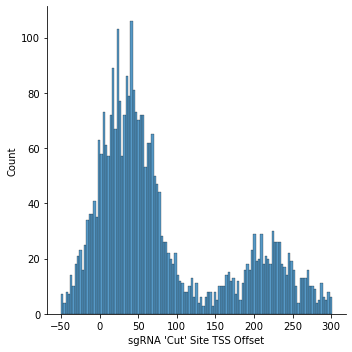

In [9]:
sns.displot(horlbeck_2016_sept_nolap, x='sgRNA \'Cut\' Site TSS Offset', binwidth=3)


<AxesSubplot:xlabel="sgRNA 'Cut' Site TSS Offset", ylabel='avg_lfc'>

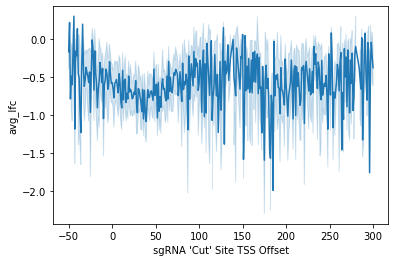

In [10]:
sns.lineplot(data=horlbeck_2016_sept_nolap, x='sgRNA \'Cut\' Site TSS Offset', y="avg_lfc")


In [11]:
conditions = [
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] <= 250) & (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] > 225),
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] <= 225) & (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] > 200),
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] <= 200) & (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] > 175),
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] <= 175) & (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] > 150),
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] <= 150) & (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] > 125),
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] <= 125) & (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] > 100),
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] <= 100) & (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] > 75),
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] <= 75) & (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] > 50),
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] <= 50) & (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] > 25),
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] <= 25) & (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] > 0),
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] <= 0) & (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] > -25),
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] <= -25) & (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] > -50),
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] <= -50),
    (horlbeck_2016_sept_nolap['sgRNA \'Cut\' Site TSS Offset'] > 250)
]

values_tss = ['+225 to +250', '+200 to +225', '+175 to +200', '+150 to +175', '+125 to +150', '+100 to +125',
         '+75 to +100', '+50 to +75', '+25 to +50', '0 to +25', '-25 to 0', '-50 to -25', '<-50', '>+250' ]
value_sort = [13,12,11,10,9,8,7,6,5,4,3,2,1,14]
horlbeck_2016_sept_nolap['tss_sort'] = np.select(conditions, value_sort)

horlbeck_2016_sept_nolap['tss_bin'] = np.select(conditions, values_tss)


/var/folders/h4/ryygmkjj3m32xw7cjfk2gbvr0000gq/T/ipykernel_59074/3490182131.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horlbeck_2016_sept_nolap['tss_sort'] = np.select(conditions, value_sort)
/var/folders/h4/ryygmkjj3m32xw7cjfk2gbvr0000gq/T/ipykernel_59074/3490182131.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horlbeck_2016_sept_nolap['tss_bin'] = np.select(conditions, values_tss)


In [12]:
fra_act = -1.5
sgRNA_act_fra = []
for val in values_tss:
    val_tss = horlbeck_2016_sept_nolap[horlbeck_2016_sept_nolap['tss_bin'] == val]
    total_val = len(val_tss)
    act_val = sum(val_tss['avg_lfc'] <= fra_act)
    sgRNA_act_fra.append(act_val/total_val)


In [13]:
horlbeck_2016_sept_nolap['fra_active'] = np.select(conditions, sgRNA_act_fra)


/var/folders/h4/ryygmkjj3m32xw7cjfk2gbvr0000gq/T/ipykernel_59074/2863323716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horlbeck_2016_sept_nolap['fra_active'] = np.select(conditions, sgRNA_act_fra)


In [20]:
tss_graph = horlbeck_2016_sept.groupby('tss_bin')[['avg_lfc','tss_sort','fra_active']].agg('mean')

KeyError: 'tss_bin'

In [ ]:
tss_graph = tss_graph.sort_values('tss_sort').reset_index(level=0)

In [21]:
len(horlbeck_2016_sept)

3257

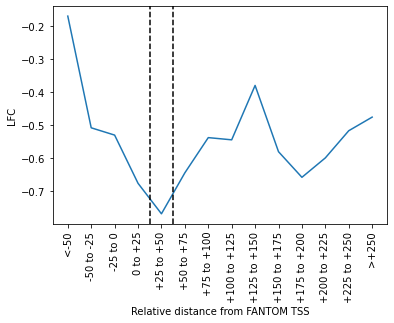

In [22]:
ax = sns.lineplot(data=tss_graph, x='tss_bin', y="avg_lfc")
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Relative distance from FANTOM TSS', ylabel='LFC')
ax.axvline(3.5, 0,1, color = 'black', linestyle = '--')
ax.axvline(4.5, 0,1, color = 'black', linestyle = '--')
gpp.savefig('../figure/lfc_vs_tss_horlbeck_2016.pdf', dpi=300)



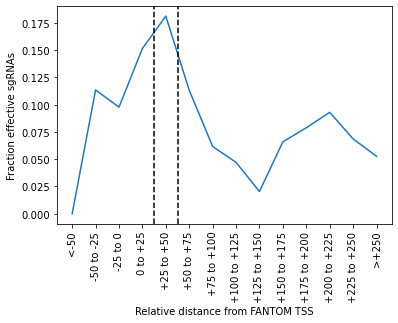

In [23]:
ax = sns.lineplot(data=tss_graph, x='tss_bin', y="fra_active")
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Relative distance from FANTOM TSS', ylabel='Fraction effective sgRNAs')
ax.axvline(3.5, 0,1, color = 'black', linestyle = '--')
ax.axvline(4.5, 0,1, color = 'black', linestyle = '--')
gpp.savefig('../figure/fraction_active_lfc_horlbeck_2016.pdf', dpi=300)

